# 1.10

### Setup

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def get_delta_t(delta_x, buffer):
    return 0.5 * np.square(delta_x) * buffer

### Initialization

In [3]:
space_steps = 101
    
delta_x = 1/(space_steps - 1)
delta_t = 0.001

time_step_space = 0.3

time_steps = int(np.ceil(time_step_space / delta_t))

current_temperature = np.zeros(space_steps)
next_temperature = np.zeros(space_steps)
plot_data = []

current_temperature[0] = 350
current_temperature[-1] = 250

next_temperature[0] = 350
next_temperature[-1] = 250

alpha = delta_t / delta_x**2

### Heat simulation

In [14]:
for i in range(space_steps - 2):
    j = (i + 1) * delta_x
    current_temperature[i + 1] = 350 - 100 * j + 200 * np.sin(np.pi * j)
    
a = (1 + 2 * alpha) * np.ones(space_steps)
b = -alpha * np.ones(space_steps - 1)
F = np.zeros(space_steps)

F[0] = 350
F[-1] = 250

F = F * alpha + current_temperature

c = np.zeros(space_steps)
c[0] = a[0]

# A = np.diag(b[1:], -1) + np.diag(a) + np.diag(b[:-1], 1)

for i in range(1, space_steps):
    c[i] = a[i] - (np.square(b[i - 1]) / c[i - 1])

# Time-stepping
plot_data = [current_temperature.copy()]
for t in range(time_steps):
    
    for i in range(1, space_steps):
        F[i] = F[i] - (b[i - 1] / c[i - 1]) * F[i - 1] #g and f vector at some point
    
    for i in range(space_steps - 2, 1, -1):
        current_temperature[i] = (F[i] - (b[i] * F[i + 1])) / c[i]
    
    print(current_temperature)
    break
    
    plot_data.append(current_temperature.copy())

[ 350.          355.28215182 1137.16273593 1112.2654413  1104.7275778
 1107.30796076 1115.53400486 1126.85401681 1139.84137424 1153.69987602
 1167.98151988 1182.4298478  1196.89385753 1211.28084122 1225.53054201
 1239.60095771 1253.46050982 1267.08369869 1280.44867494 1293.53586982
 1306.32721477 1318.80569196 1330.95507276 1342.75976446 1354.20472033
 1365.27538737 1375.95767709 1386.23795037 1396.10301127 1405.54010656
 1414.53692888 1423.0816223  1431.16278922 1438.76949832 1445.8912929
 1452.51819944 1458.6407362  1464.24992165 1469.33728264 1473.89486234
 1477.91522766 1481.39147639 1484.31724382 1486.68670882 1488.49459958
 1489.73619867 1490.40734766 1490.5044512  1490.02448053 1488.96497645
 1487.32405171 1485.10039292 1482.29326175 1478.90249575 1474.92850843
 1470.37228889 1465.23540083 1459.51998098 1453.22873705 1446.364945
 1438.93244583 1430.93564179 1422.37949203 1413.26950771 1403.61174655
 1393.41280688 1382.67982108 1371.42044859 1359.64286832 1347.35577059
 1334.5683

### 3D Plot

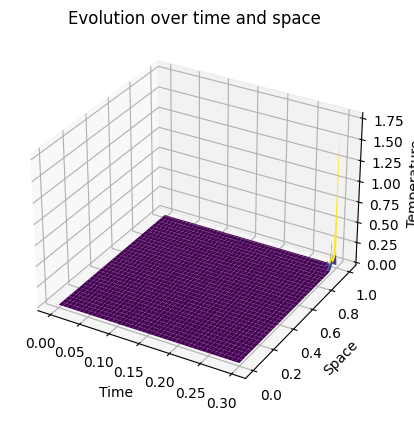

In [12]:
#plotting
data_np = np.array(plot_data)
data_np = data_np.T 

space = np.linspace(0, 1, space_steps)
time = np.linspace(0, time_step_space, time_steps + 1)

Time, Space = np.meshgrid(time, space)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(Time, Space, data_np, cmap='viridis') 

ax.set_xlabel('Time')
ax.set_ylabel('Space')
ax.set_zlabel('Temperature')
ax.set_title('Evolution over time and space')
plt.show()

### 2D Plot

IndexError: index 50 is out of bounds for axis 1 with size 1

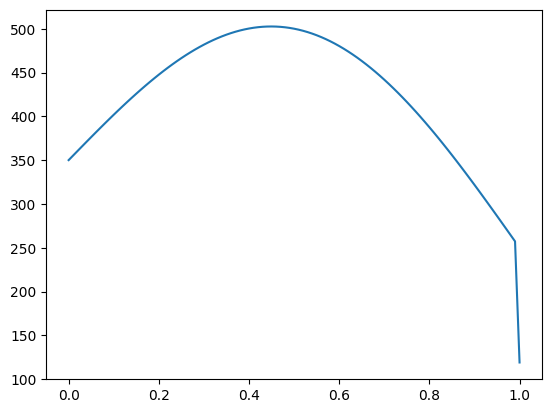

In [35]:
#plotting
data_np = np.array(plot_data)
data_np = data_np.T 

space = np.linspace(0, 1, space_steps)
time = np.linspace(0, 1, time_steps)

# Plotting for discrete timestamp values
for t in range(0, time_steps, 50):  # Change the step size as per your requirement
    plt.plot(space, data_np[:, t], label=f'Time={t}')

plt.xlabel('Space')
plt.ylabel('Value')
plt.title('Evolution over space')
plt.legend()
plt.show()